In [2]:
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [3]:
# Connection to Mongo DB
conn = pymongo.MongoClient()
print("Connected successfully!!!")
db = conn.miniproject

Connected successfully!!!


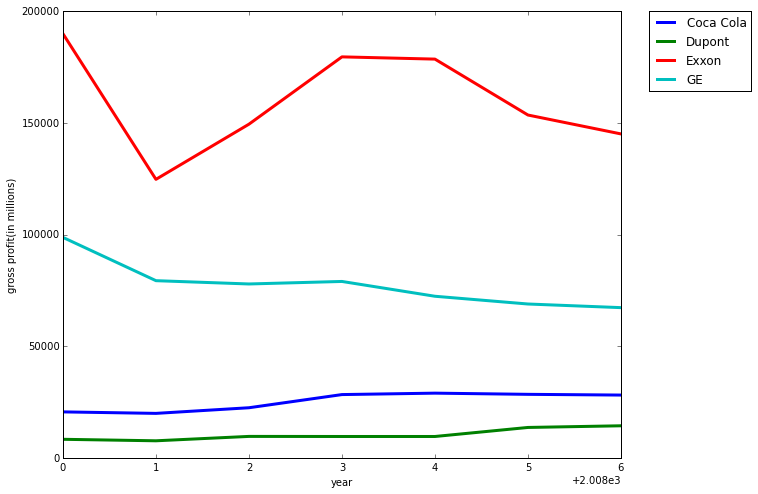

In [99]:
from tabulate import tabulate
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

cursor = db.sec10k.find({"company.name":"Coca Cola"},{"financialData":1,"year":1,"_id":0})
cokeData =  pd.DataFrame(list(cursor))
cursor = db.sec10k.find({"company.name":"DUPONT E I DE NEMOURS & CO"},{"financialData":1,"year":1,"_id":0})
ddData = pd.DataFrame(list(cursor))
cursor = db.sec10k.find({"company.name":"EXXON MOBIL CORP"},{"financialData":1,"year":1,"_id":0})
exxonData = pd.DataFrame(list(cursor))
cursor = db.sec10k.find({"company.name":"GENERAL ELECTRIC CO"},{"financialData":1,"year":1,"_id":0})
geData = pd.DataFrame(list(cursor))
gpc=[]
gpd=[]
gpe=[]
gpg=[]
year=[]
for i in range(0,7):
    gpc.append(cokeData["financialData"][i]["grossprofit"])
    gpd.append(ddData["financialData"][i]["grossprofit"])
    gpe.append(exxonData["financialData"][i]["grossprofit"])
    gpg.append(geData["financialData"][i]["grossprofit"])
    year.append(cokeData["year"][i])

fig=plt.figure(figsize=(10, 8), dpi=200)
ax=fig.add_subplot(111)
ax.plot(year,gpc,label="Coca Cola",linewidth=3)
ax.plot(year,gpd,label="Dupont",linewidth=3)
ax.plot(year,gpe,label="Exxon",linewidth=3)
ax.plot(year,gpg,label="GE",linewidth=3)
ax.legend()
ax.set_ylabel("gross profit(in millions)")
ax.set_xlabel("year")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()